<h2>Traffic_Simulation</h2>

Lars Schuster 29.10.2022

Nagel-Schreckenberg model

Traffic can be moddled using cellular automata. To do that some simplifications have to be done. 
First the street is modled as cells with a length of 7.5m.
Each cell can either have a car in it or not.
The cars can move between 0 or 5 cells per time step. Their velocities reach from 0 to 5.

Some more assumtions are made about the behaviour of drivers.
All cars that have enough space in front of them will speed up until they reach maximum velocity.
If there is a car in front they will slow down to avoid crashing and leave a long enough gap.
Randomly some drivers slow down slightly.

To implement theses assumtion the update rules of the cells are the following.

1. All cars speed up by 1 at every step until they reach a velocity of 5.
2. If the movement of a cars velocity would cause a car to overlap with a car infront or to overtake it the velocity is decreased so the car is just behind the current position of the other car.
3. Every car can slow down by 1 with a probability of p.
4. Lastly all cars are moved forward by their respective velocity.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import animation
from IPython import display

#function to calculate new state of the nagel schreckenberg model
def new_state(state, n_cars,p):
    tempstate = np.copy(state)
    #step 1
    for i in range(n_cars):
        if state[i] != -1 and state[i] < 5:
            tempstate[i] += 1
    
    #step 2
    for i in range(n_cars):
        if tempstate[i] != -1:
            j = 1
            while tempstate[(i+j) % n_cars] == -1 and j <= 5:
                j += 1
            if j <= tempstate[i]:
                tempstate[i] = j-1
    
    #step 3
    for i in range(n_cars):
        if random.random() < p and state[i] > 0:
            tempstate[i] -= 1

    #step 4
    newstate = np.full(n_cars, -1)
    for i in range(n_cars):
        if tempstate[i] != -1:
            newstate[(i+ tempstate[i]) % n_cars] = tempstate[i]

    return newstate


The function new_state takes the inputs of the array with the current "state", the number of cars "n_cars" and the dawdle probability "p".
The empty spaces on the road are assigned the value -1.

The function implements the 4 steps and returns an array of the new state with the new positions of the cars.

In [16]:
def nagel_schreckenberg(n_cars, t, p, state):
    result = np.zeros((t, n_cars))
    result[0] = state
    #simulation
    for i in range(1, t):
        state = new_state(state, n_cars, p)
        result[i] = state
    return result

The nagel_schreckenberg function takes the number of cars "n_cars", the total of timesteps to compute "t", the dawdle probabilty "p" and the initial "state" as parameters.

It then computes the  new state "t" times and adds it to the array "result" which is then returned.

In [17]:
plt.rcParams['image.cmap'] = 'binary'
def plt_model(result):
    fig, ax = plt.subplots(figsize=(9, 16))
    ax.matshow(result)
    ax.set_xlabel('space')
    ax.set_ylabel('time')


def create_anim(result, t):
    fig = plt.figure(figsize=(20, 1))
    ax = fig.add_axes([0, 0, 1, 1, ])
    init = ax.imshow([result[0]], vmin=result.min(),
                     vmax=result.max(), animated=True)

    def anim(i):
        init.set_array([result[i]])
        return init

    anim = animation.FuncAnimation(fig, anim, frames=t, interval=200)
    writer = animation.writers['html']
    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    plt.close()


The functions plt_model creates a space time diagram and the function create_anim animates the result.

In both cases the empty street segments are white. The cars with a low velocity are symbolized by a grey square and the squares become darker, the faster a car moves.

In the following a circular street of 100 elements (750m)  is simulated with a traffic jam of five cars at the beginning of the street and 10 other cars at random positions with random speeds.
The dawdle probability is set to be 0.

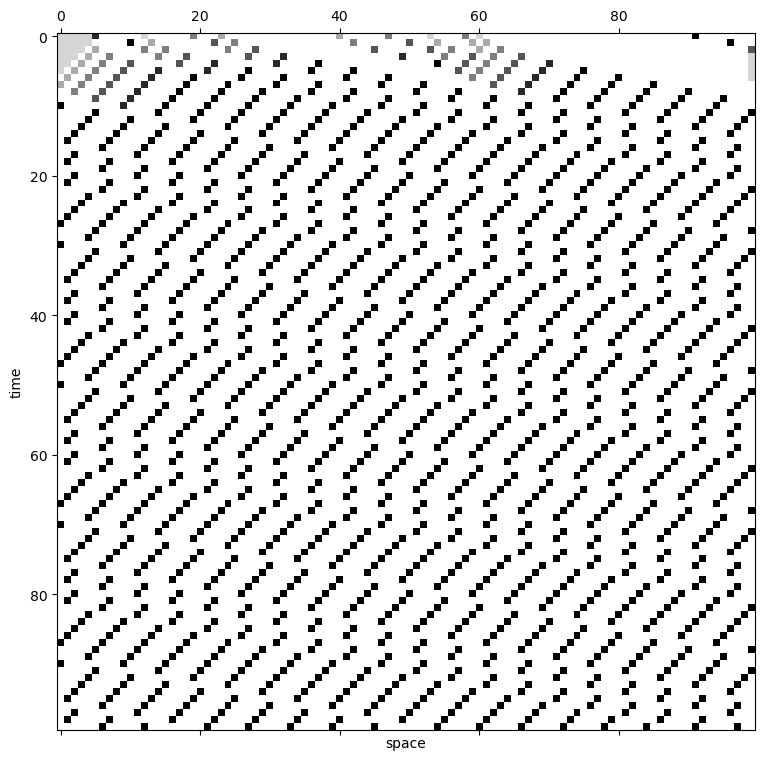

In [18]:
n_cars = 100
t = 100
p = 0.0

#create array with 95 numbers 80 times -1 and 15 numbers betweeen 0 and 5
ramdomize = np.concatenate(
    (np.full(85, -1, dtype="int"), np.random.randint(0, 6, 10, dtype="int")))
np.random.shuffle(ramdomize)
state = np.concatenate((np.full(5, 0, dtype="int"), ramdomize))

result = nagel_schreckenberg(n_cars, t, p, state)
plt_model(result)


The space-time diagram shows how the traffic jam propagates "backwards" new cars arriving from the back stop and end up waiting.
At the right of the traffic jam the cars one by one start seperating and speeding up. Since no random slowing down appears and only 15 cars are in the street segment they end up reaching a perfect state where all cars can drive at maximum speed and no traffic jams occur.

In the next simulation the input is identical to the previous one except that the dawdle probability is set to be 0.3.

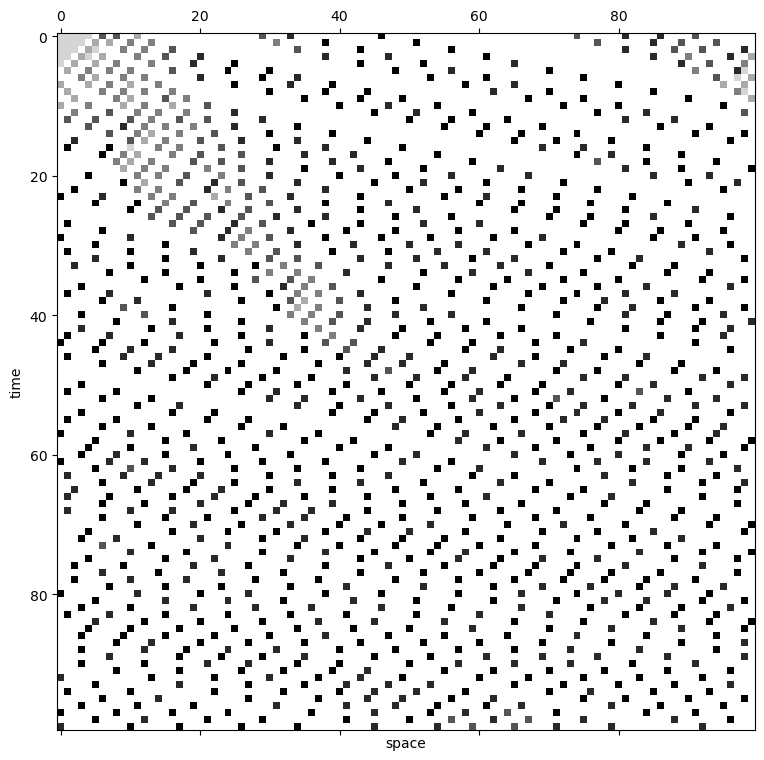

In [19]:
n_cars = 100
t = 100
p = 0.3

#create array with 95 numbers 80 times -1 and 15 numbers betweeen 0 and 5
ramdomize = np.concatenate(
    (np.full(85, -1, dtype="int"), np.random.randint(0, 6, 10, dtype="int")))
np.random.shuffle(ramdomize)
state = np.concatenate((np.full(5, 0, dtype="int"), ramdomize))

result = nagel_schreckenberg(n_cars, t, p, state)
plt_model(result)


With the dawdle probability at 0.3 the scenario becomes a lot more chaotic. The traffic jams still tend to propagate backwards. Now at random time intervals some slow regions appear even after a long time. No equilibrium will be reached.

For the next simulation the density of cars is doubled so the initial traffic jam is 10 cars long and there are 20 more cars randomly placed with random velocities.

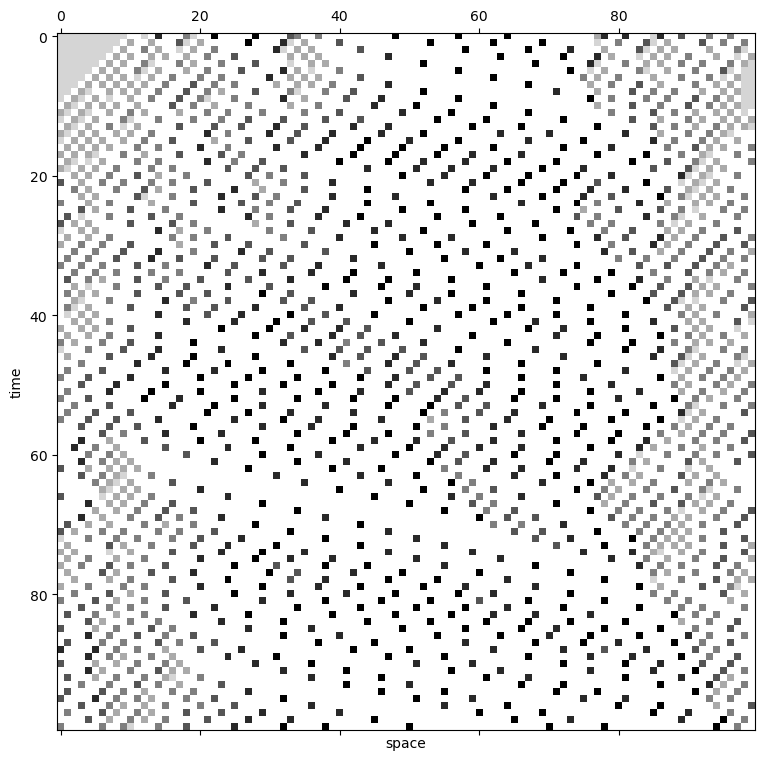

In [20]:
n_cars = 100
t = 100
p = 0.3

ramdomize = np.concatenate(
    (np.full(70, -1, dtype="int"), np.random.randint(0, 6, 20, dtype="int")))
np.random.shuffle(ramdomize)
state = np.concatenate((np.full(10, 0, dtype="int"), ramdomize))

result = nagel_schreckenberg(n_cars, t, p, state)
plt_model(result)

With twice as many cars on the road the traffic jams stay for much longer and form more oftenly. However there are still surprisingly a lot of times where the majority can still drive with a quite high velocity. Some of the traffic jams do not resolve even after a long time.

The data of the simulations aggrees with the simulation on this website:
https://bolay.de/kai/RoadApplet/
written by Kai Bolay